In [1]:

from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tqdm import tqdm
import os
from glob import glob
import pandas as pd
import json
from skimage.draw import polygon2mask
import shutil

In [2]:
json_list=glob('../../data/origin_json/BRDC/*.json')
image_path="../../data/origin_json/BRDC/"
save_img_path='../../data/area_segmentation/BRDC/image/'
save_mask_path='../../data/area_segmentation/BRDC/mask/'
save_overlay_path='../../data/area_segmentation/BRDC/overlay/'

In [57]:
class_list=['NT_epithelial', 'NT_immune', 'NT_stroma', 'TP_in_situ', 'TP_invasive']
for j in tqdm(range(len(json_list))):
    with open(json_list[j], 'r') as f:

        json_data = json.load(f)
    anno=json_data['content']['file']['objects']
    file_name=json_data['content']['file']['filename']
    # for i in range(len(anno)):
    #     class_list.append(anno[i]['label_nm'])
    # class_list=list(set(class_list))
    # shutil.copyfile(image_path+file_name, save_img_path+file_name)
    mask=np.zeros((1024,1024,len(class_list)))
    for k in range(len(anno)):
        coordinate=np.array(anno[k]['coordinate'])
        coordinate[:,[0, 1]]=coordinate[:,[1, 0]]
        class_nm=anno[k]['label_nm']
        mask_temp=polygon2mask((1024,1024), coordinate)
        mask[...,class_list.index(class_nm)]+=mask_temp
    mask=np.where(mask>=1,255,0)
    for i in range(len(class_list)):
        Image.fromarray(mask[...,i].astype(np.uint8)).save(save_mask_path+f'{class_list[i]}/'+file_name.replace('.jpeg', '.png'))
    # np.save(save_mask_path+'npy/'+file_name.replace('.jpeg', ''), mask) # x_save.npy
    img=np.array(Image.open(image_path+file_name))
    overlay=img*0.7+mask[...,:3]*0.3
    overlay[...,0]+=mask[...,3]*0.3
    overlay[...,1]+=mask[...,3]*0.3
    overlay[...,1]+=mask[...,4]*0.3
    overlay[...,2]+=mask[...,4]*0.3
    Image.fromarray(overlay.astype(np.uint8)).save(save_overlay_path+file_name)
    
    

100%|██████████| 562/562 [05:28<00:00,  1.71it/s]


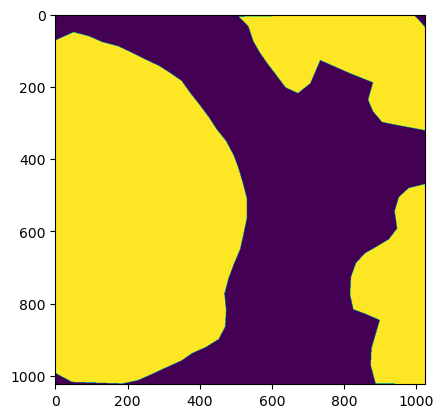

In [55]:
plt.imshow(mask[...,3])

In [8]:
mask*0.2

255